In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt

In [44]:
stocks = ["AAPL","MSFT","NVDA","AMZN"]
weights = np.array([0.25,0.25,0.25,0.25])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [45]:
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

C:\Users\pablo\AppData\Local\Temp\ipykernel_15188\2018562991.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]


Media diaria retornos:
Ticker
AAPL    0.000917
AMZN    0.001201
MSFT    0.000741
NVDA    0.003407
dtype: float64
\nMatriz de covarianza:
Ticker      AAPL      AMZN      MSFT      NVDA
Ticker                                        
AAPL    0.000263  0.000144  0.000106  0.000179
AMZN    0.000144  0.000387  0.000167  0.000272
MSFT    0.000106  0.000167  0.000221  0.000237
NVDA    0.000179  0.000272  0.000237  0.000967


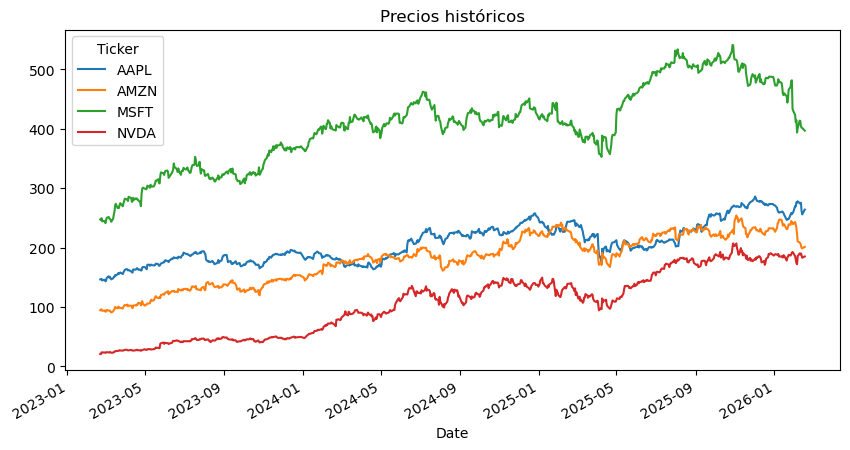

In [46]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

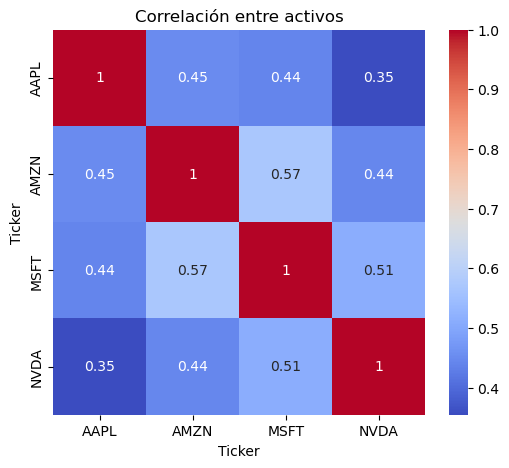

In [47]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

- ¿Qué activos están más correlacionados?

MSFT Y AMAZON
- ¿El portafolio parece estable o muy variable?

Parece estable
- ¿Cuál activo parece dominar el comportamiento del portafolio?

NVDA



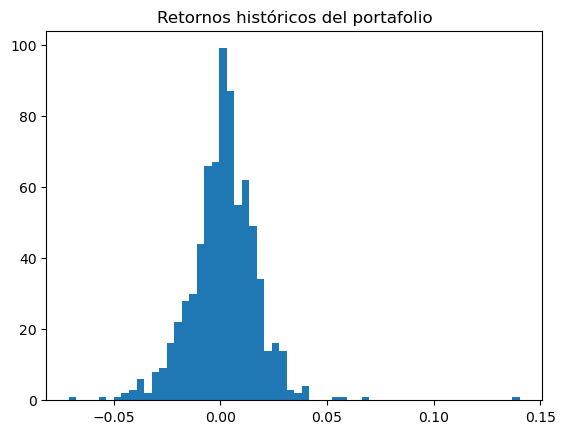

Volatilidad histórica diaria: 0.01589839930986936


In [48]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())

In [49]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [50]:
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

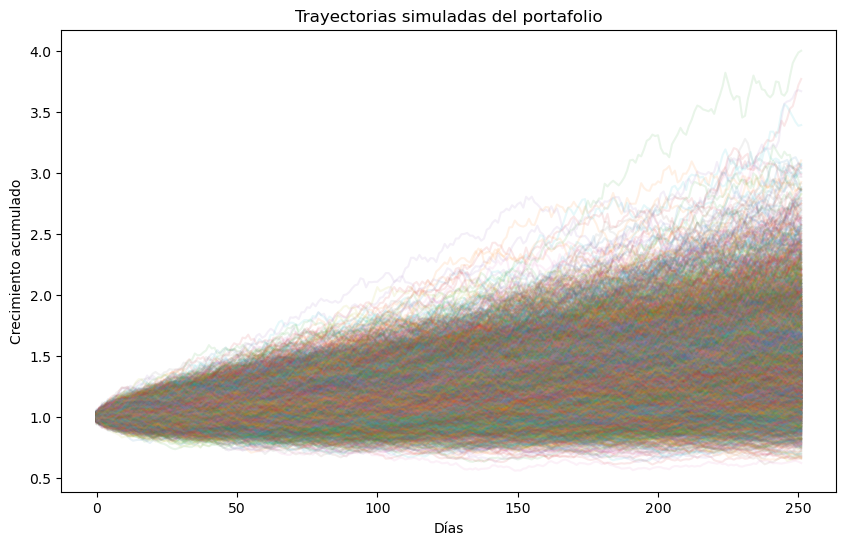

In [51]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

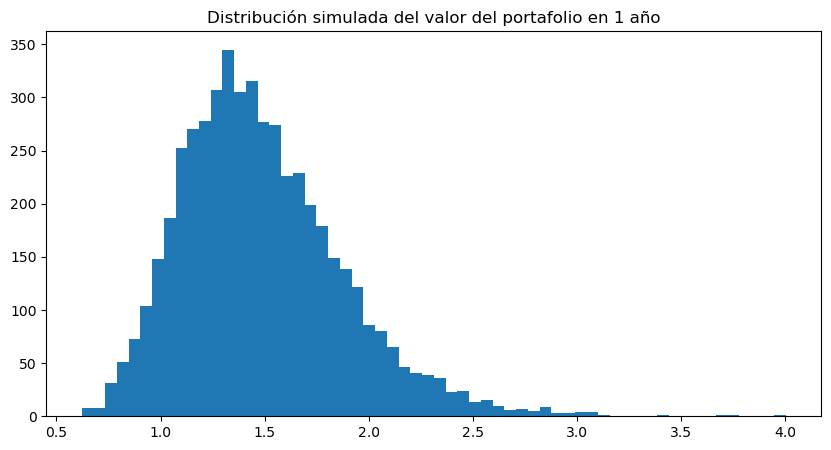

Valor esperado final: 1.4858674882007774
Probabilidad de pérdida: 0.077
Valor mínimo observado: 0.6205916390281575
Valor máximo observado: 4.003876438926173


In [52]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))
print("Valor mínimo observado:", final_values.min())
print("Valor máximo observado:", final_values.max())

- ¿Las trayectorias simuladas son similares entre sí o muy distintas?

Similares
- ¿La dispersión aumenta con el tiempo?

Sí
- ¿Qué observas en la distribución final del portafolio?

Está sesgada, tiene más ganancias que pérdidas

## Exploración Libre

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt

In [64]:
stocks = ["BAC","F","PFE","HPE"]
weights = np.array([0.1,0.3,0.4,0.2])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [65]:
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

C:\Users\pablo\AppData\Local\Temp\ipykernel_15188\2018562991.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]


Media diaria retornos:
Ticker
BAC    0.000803
F      0.000682
HPE    0.000835
PFE   -0.000236
dtype: float64
\nMatriz de covarianza:
Ticker       BAC         F       HPE       PFE
Ticker                                        
BAC     0.000262  0.000155  0.000193  0.000051
F       0.000155  0.000463  0.000170  0.000080
HPE     0.000193  0.000170  0.000595  0.000055
PFE     0.000051  0.000080  0.000055  0.000233


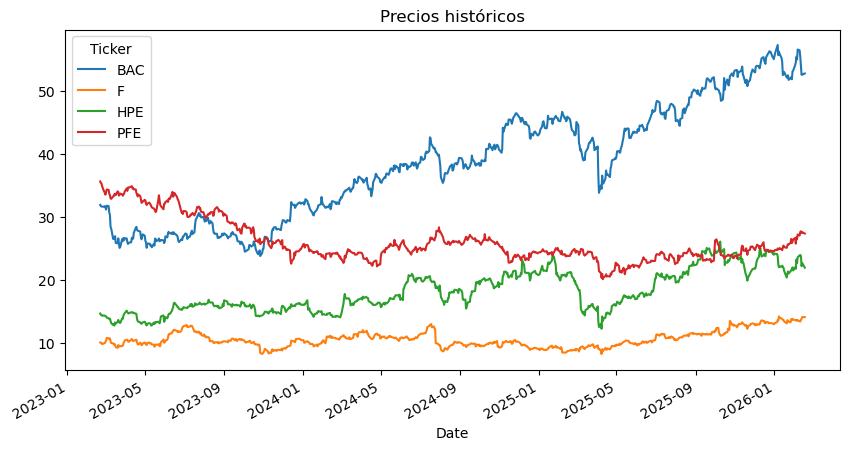

In [66]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

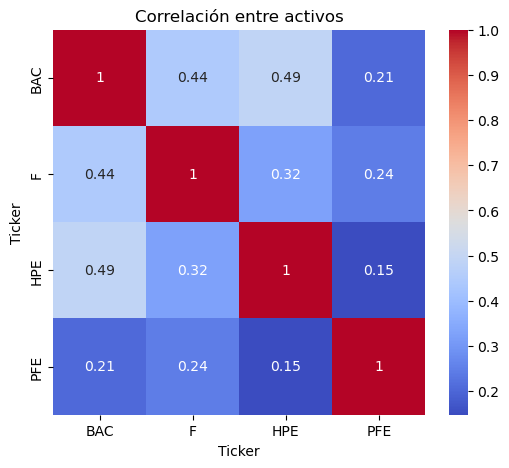

In [67]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

- ¿Qué activos están más correlacionados?

BAC Y HPE
- ¿El portafolio parece estable o muy variable?

Parece estable
- ¿Cuál activo parece dominar el comportamiento del portafolio?

BAC



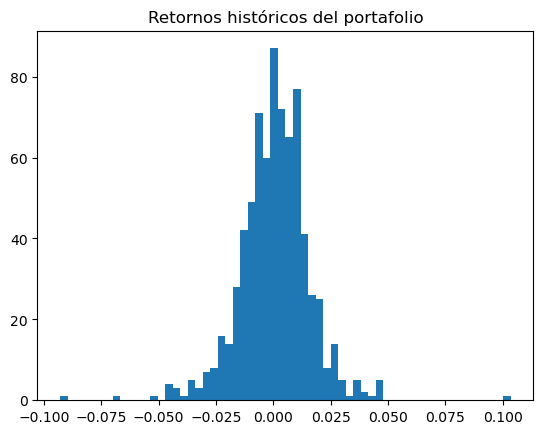

Volatilidad histórica diaria: 0.015322993147630894


In [68]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())

In [73]:
num_sim = 5000
num_days = 100
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [74]:
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

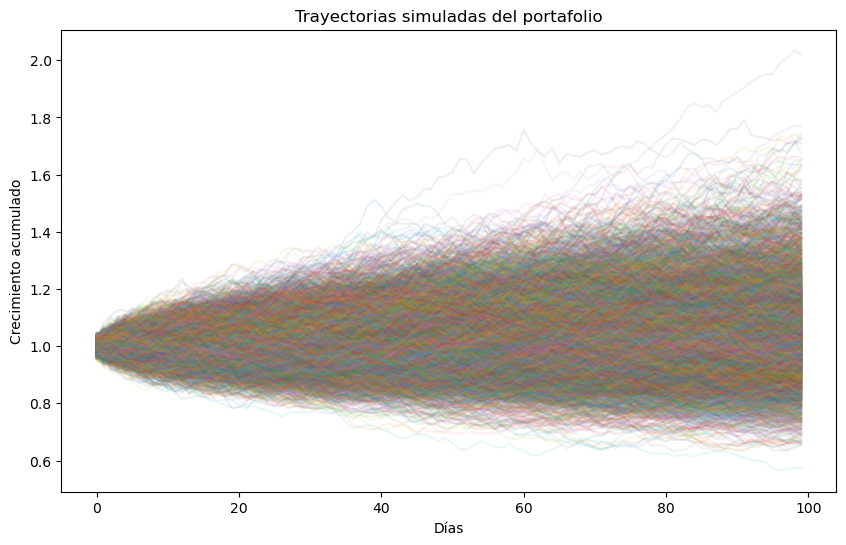

In [75]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

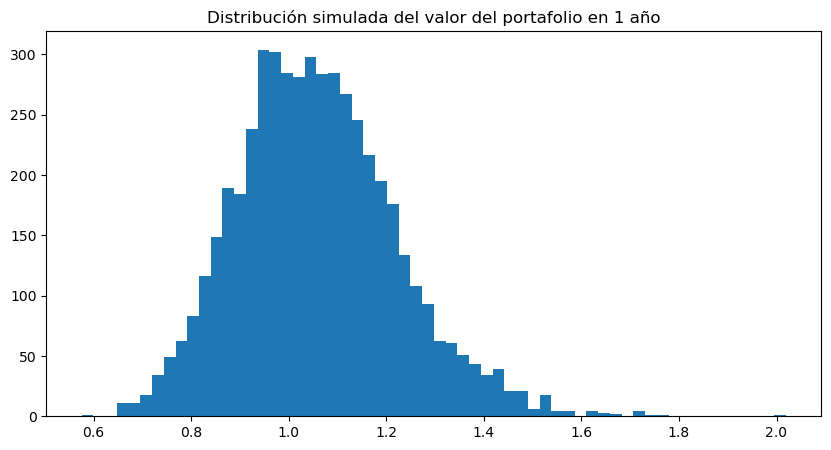

Valor esperado final: 1.0579943591328802
Probabilidad de pérdida: 0.3868
Valor mínimo observado: 0.57549003582601
Valor máximo observado: 2.0196030467575166


In [76]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))
print("Valor mínimo observado:", final_values.min())
print("Valor máximo observado:", final_values.max())

- ¿Las trayectorias simuladas son similares entre sí o muy distintas?

Similares
- ¿La dispersión aumenta con el tiempo?

Sí
- ¿Qué observas en la distribución final del portafolio?

Está sesgada, tiene más ganancias que pérdidas

Las simulaciones cambian conforme al peso de cada activo. especialmente si ganó o perdió mucho

Mientras menor el horizonte temporal, menor el rango entre pérdida y ganancia